In [ ]:
from Problem import *
from Optimizer import *


def main():
    p, alg = readPlanAndCreate()  # Setup and create (problem, algorithm)
    conductExperiment(p, alg)     # Conduct experiment & produce results
    p.describe()                  # Describe the problem solved
    alg.displayNumExp()           # Total number of experiments
    alg.displaySetting()          # Show the algorithm settings
    p.report()                    # Report result

def readPlanAndCreate():
    parameters = readValidPlan()  # Read and store in 'parameters'
    p = createProblem(parameters)
    alg = createOptimizer(parameters)
    return p, alg

def readValidPlan():  # Gradient Descent cannot solve TSP
    while True:
        parameters = readPlan()
        if parameters['pType'] == 2 and parameters['aType'] == 4:
            print("You cannot choose Gradient Descent")
            print("       unless your want a numerical optimization.")
        else:
            break
    return parameters

def readPlan():
    fileName = input("Enter the file name of experimental setting: ")
    infile = open(fileName, 'r')
    parameters = { 'pType':0, 'pFileName':'', 'aType':0, 'delta':0,
                   'limitStuck':0, 'alpha':0, 'dx':0, 'numRestart':0,
                   'limitEval':0, 'numExp':0 }
    parNames = list(parameters.keys())
    for i in range(len(parNames)):
        line = lineAfterComments(infile)
        if parNames[i] == 'pFileName':
            parameters[parNames[i]] = line.rstrip().split(':')[-1][1:]
        else:
            parameters[parNames[i]] = eval(line.rstrip().split(':')[-1][1:])
    infile.close()
    return parameters             # Return a dictionary of parameters

def lineAfterComments(infile):    # Ignore lines beginning with '#'
    line = infile.readline()      # and then return the first line
    while line[0] == '#':         # with no '#'
        line = infile.readline()
    return line

def createProblem(parameters): ###
    # Create a problem instance (a class object) 'p' of the type as 
    # specified by 'pType', set the class variables, and return 'p'.
    pType = parameters['pType']
    if pType == 1:
        p = Numeric()
    elif pType ==2:
        p = Tsp()

    p.setVariables(parameters)

    return p

def createOptimizer(parameters): ###
    # Create an optimizer instance (a class object) 'alg' of the type  
    # as specified by 'aType', set the class variables, and return 'alg'.
    optimizers = {  1 : 'SteepestAscent()',
                    2 : 'FirstChoice()',
                    3 : 'Stochastic()',
                    4 : 'GradientDescent()',
                    5 : 'SimulatedAnnealing()'}
    aType = parameters['aType']
    alg = eval(optimizers[aType])
    alg.setVariables(parameters)

    return alg

def conductExperiment(p, alg):
    aType = alg.getAType()
    if 1 <= aType <= 4:
        alg.randomRestart(p)
    else:
        alg.run(p)
    bestSolution = p.getSolution()
    bestMinimum = p.getValue()    # First result is current best
    numEval = p.getNumEval()
    sumOfMinimum = bestMinimum    # Prepare for averaging
    sumOfNumEval = numEval        # Prepare for averaging
    sumOfWhen = 0                 # When the best solution is found
    if 5 <= aType <= 6:
        sumOfWhen = alg.getWhenBestFound()
    numExp = alg.getNumExp()
    for i in range(1, numExp):
        if 1 <= aType <= 4:
            alg.randomRestart(p)
        else:
            alg.run(p)
        newSolution = p.getSolution()
        newMinimum = p.getValue()  # New result
        numEval = p.getNumEval()
        sumOfMinimum += newMinimum
        sumOfNumEval += numEval
        if 5 <= aType <= 6:
            sumOfWhen += alg.getWhenBestFound()
        if newMinimum < bestMinimum:
            bestSolution = newSolution  # Update the best-so-far
            bestMinimum = newMinimum
    avgMinimum = sumOfMinimum / numExp
    avgNumEval = round(sumOfNumEval / numExp)
    avgWhen = round(sumOfWhen / numExp)
    results = (bestSolution, bestMinimum, avgMinimum,
               avgNumEval, sumOfNumEval, avgWhen)
    p.storeExpResult(results)

main()



Enter the file name of experimental setting: exp.txt

Number of cities: 100
City locations:
     (49, 3)    (74, 73)    (65, 36)    (39, 41)    (61, 99)
    (69, 44)    (88, 92)    (97, 28)    (53, 64)    (30, 77)
    (96, 62)    (61, 45)     (30, 3)    (66, 41)     (18, 9)
    (61, 64)    (28, 88)     (2, 72)    (80, 66)    (56, 38)
    (51, 16)     (18, 2)    (89, 18)    (67, 66)     (72, 6)
    (53, 32)    (29, 25)    (77, 69)    (89, 56)    (68, 88)
    (98, 53)    (36, 25)     (16, 0)    (20, 32)   (100, 10)
    (49, 49)    (85, 38)    (42, 52)     (3, 85)    (62, 77)
    (97, 87)    (75, 54)    (40, 19)    (32, 33)     (59, 1)
    (90, 43)    (62, 11)    (77, 14)    (88, 66)    (39, 32)
    (34, 69)    (12, 73)    (58, 88)    (34, 19)    (32, 45)
    (36, 36)    (84, 47)    (28, 18)    (23, 57)    (14, 52)
    (29, 38)     (0, 17)    (87, 96)    (61, 11)    (45, 56)
     (2, 60)    (97, 67)    (73, 70)    (49, 94)    (88, 55)
    (40, 55)    (23, 27)    (33, 68)    (70, 84)     (

In [1]:
from Problem import *
from Optimizer import *


def main():
    p, alg = readPlanAndCreate()  # Setup and create (problem, algorithm)
    conductExperiment(p, alg)     # Conduct experiment & produce results
    p.describe()                  # Describe the problem solved
    alg.displayNumExp()           # Total number of experiments
    alg.displaySetting()          # Show the algorithm settings
    p.report()                    # Report result

def readPlanAndCreate():
    parameters = readValidPlan()  # Read and store in 'parameters'
    p = createProblem(parameters)
    alg = createOptimizer(parameters)
    return p, alg

def readValidPlan():  # Gradient Descent cannot solve TSP
    while True:
        parameters = readPlan()
        if parameters['pType'] == 2 and parameters['aType'] == 4:
            print("You cannot choose Gradient Descent")
            print("       unless your want a numerical optimization.")
        else:
            break
    return parameters

def readPlan():
    fileName = input("Enter the file name of experimental setting: ")
    infile = open(fileName, 'r')
    parameters = { 'pType':0, 'pFileName':'', 'aType':0, 'delta':0,
                   'limitStuck':0, 'alpha':0, 'dx':0, 'numRestart':0,
                   'limitEval':0, 'numExp':0 }
    parNames = list(parameters.keys())
    for i in range(len(parNames)):
        line = lineAfterComments(infile)
        if parNames[i] == 'pFileName':
            parameters[parNames[i]] = line.rstrip().split(':')[-1][1:]
        else:
            parameters[parNames[i]] = eval(line.rstrip().split(':')[-1][1:])
    infile.close()
    return parameters             # Return a dictionary of parameters

def lineAfterComments(infile):    # Ignore lines beginning with '#'
    line = infile.readline()      # and then return the first line
    while line[0] == '#':         # with no '#'
        line = infile.readline()
    return line

def createProblem(parameters): ###
    # Create a problem instance (a class object) 'p' of the type as 
    # specified by 'pType', set the class variables, and return 'p'.
    pType = parameters['pType']
    if pType == 1:
        p = Numeric()
    elif pType ==2:
        p = Tsp()

    p.setVariables(parameters)

    return p

def createOptimizer(parameters): ###
    # Create an optimizer instance (a class object) 'alg' of the type  
    # as specified by 'aType', set the class variables, and return 'alg'.
    optimizers = {  1 : 'SteepestAscent()',
                    2 : 'FirstChoice()',
                    3 : 'Stochastic()',
                    4 : 'GradientDescent()',
                    5 : 'SimulatedAnnealing()'}
    aType = parameters['aType']
    alg = eval(optimizers[aType])
    alg.setVariables(parameters)

    return alg

def conductExperiment(p, alg):
    aType = alg.getAType()
    if 1 <= aType <= 4:
        alg.randomRestart(p)
    else:
        alg.run(p)
    bestSolution = p.getSolution()
    bestMinimum = p.getValue()    # First result is current best
    numEval = p.getNumEval()
    sumOfMinimum = bestMinimum    # Prepare for averaging
    sumOfNumEval = numEval        # Prepare for averaging
    sumOfWhen = 0                 # When the best solution is found
    if 5 <= aType <= 6:
        sumOfWhen = alg.getWhenBestFound()
    numExp = alg.getNumExp()
    for i in range(1, numExp):
        if 1 <= aType <= 4:
            alg.randomRestart(p)
        else:
            alg.run(p)
        newSolution = p.getSolution()
        newMinimum = p.getValue()  # New result
        numEval = p.getNumEval()
        sumOfMinimum += newMinimum
        sumOfNumEval += numEval
        if 5 <= aType <= 6:
            sumOfWhen += alg.getWhenBestFound()
        if newMinimum < bestMinimum:
            bestSolution = newSolution  # Update the best-so-far
            bestMinimum = newMinimum
    avgMinimum = sumOfMinimum / numExp
    avgNumEval = round(sumOfNumEval / numExp)
    avgWhen = round(sumOfWhen / numExp)
    results = (bestSolution, bestMinimum, avgMinimum,
               avgNumEval, sumOfNumEval, avgWhen)
    p.storeExpResult(results)

main()



Enter the file name of experimental setting: exp_1.txt

Number of cities: 100
City locations:
     (49, 3)    (74, 73)    (65, 36)    (39, 41)    (61, 99)
    (69, 44)    (88, 92)    (97, 28)    (53, 64)    (30, 77)
    (96, 62)    (61, 45)     (30, 3)    (66, 41)     (18, 9)
    (61, 64)    (28, 88)     (2, 72)    (80, 66)    (56, 38)
    (51, 16)     (18, 2)    (89, 18)    (67, 66)     (72, 6)
    (53, 32)    (29, 25)    (77, 69)    (89, 56)    (68, 88)
    (98, 53)    (36, 25)     (16, 0)    (20, 32)   (100, 10)
    (49, 49)    (85, 38)    (42, 52)     (3, 85)    (62, 77)
    (97, 87)    (75, 54)    (40, 19)    (32, 33)     (59, 1)
    (90, 43)    (62, 11)    (77, 14)    (88, 66)    (39, 32)
    (34, 69)    (12, 73)    (58, 88)    (34, 19)    (32, 45)
    (36, 36)    (84, 47)    (28, 18)    (23, 57)    (14, 52)
    (29, 38)     (0, 17)    (87, 96)    (61, 11)    (45, 56)
     (2, 60)    (97, 67)    (73, 70)    (49, 94)    (88, 55)
    (40, 55)    (23, 27)    (33, 68)    (70, 84)    

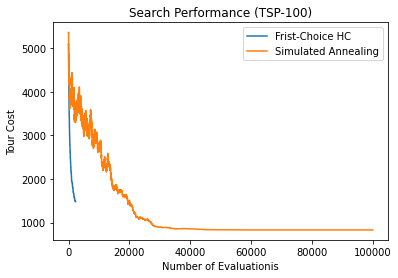

In [2]:
import matplotlib.pyplot as plt

def main():
    plotting()

def plotting():
    file1 = open('first.txt','r')
    file2 = open('annealing.txt', 'r')

    pieces1 = []
    pieces2 = []

    line1 = file1.readline()
    while line1 != '':
        pieces1.append(eval(line1))
        line1 = file1.readline()
    file1.close()

    line2 = file2.readline()
    while line2 != '':
        pieces2.append(eval(line2))
        line2 = file2.readline()
    file2.close()

    x1 = []
    y1 = []
    for i in range(len(pieces1)):
        x1.append(pieces1[i][1])
        y1.append(pieces1[i][0])
    x2 = []
    y2 = []
    for i in range(len(pieces2)):
        x2.append(pieces2[i][1])
        y2.append(pieces2[i][0])

    plt.figure()
    plt.plot(x1, y1, label = "Frist-Choice HC")
    plt.plot(x2, y2, label = "Simulated Annealing")
    plt.legend()
    plt.title('Search Performance (TSP-100)')
    plt.xlabel('Number of Evaluationis')
    plt.ylabel('Tour Cost')
    plt.savefig('pa06')
    plt.show()

main()